In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import zipfile


#importing the california data
PARENT = "Predicting_House_Prices"
path = Path(PARENT).parent / "../Data/RealEstate_Georgia.csv"
ga = pd.read_csv(path)
ga.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,31503-110785431,16,17,55064,USA,2021-07-12,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
1,1,31503-76611082,16,18,55064,USA,2021-07-12,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
2,2,31503-93126153,16,19,55064,USA,2021-07-10,0,0,Listed for sale,...,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Ware County
3,3,31503-110785598,16,20,55064,USA,2021-07-09,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Brantley County
4,4,31503-2101070583,16,21,55064,USA,2021-07-06,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Ware County


In [2]:
#importing the georgia data
path2 = Path(PARENT).parent / "../Data/RealEstate_California.csv.zip"
zf = zipfile.ZipFile(path2)
ca = pd.read_csv(zf.open("RealEstate_California.csv"))
ca.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Data/RealEstate_California.csv.zip'

In [ ]:
#combining the two datasets
all_data = pd.concat([ca, ga])
all_data

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13799,13799,30054-69864676,16,128670,8877,USA,2021-06-25,0,0,Listing removed,...,0,0.0,0,0,0,0,0,0,LOT,Newton County
13800,13800,30054-69860763,16,128671,8877,USA,2021-06-25,0,0,Listing removed,...,0,0.0,0,0,0,0,0,0,LOT,Newton County
13801,13801,30054-69887935,16,128672,8877,USA,2021-06-18,0,0,Listed for sale,...,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County
13802,13802,30054-69871474,16,128673,8877,USA,2021-06-18,0,0,Price change,...,1,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County


In [ ]:
#looking at the columns in the georgia data
print(all_data.columns)

Index(['Unnamed: 0', 'id', 'stateId', 'countyId', 'cityId', 'country',
       'datePostedString', 'is_bankOwned', 'is_forAuction', 'event', 'time',
       'price', 'pricePerSquareFoot', 'city', 'state', 'yearBuilt',
       'streetAddress', 'zipcode', 'longitude', 'latitude', 'hasBadGeocode',
       'description', 'currency', 'livingArea', 'livingAreaValue',
       'lotAreaUnits', 'bathrooms', 'bedrooms', 'buildingArea', 'parking',
       'garageSpaces', 'hasGarage', 'levels', 'pool', 'spa',
       'isNewConstruction', 'hasPetsAllowed', 'homeType', 'county'],
      dtype='object')


In [ ]:
#getting the describtive statistics of the data
all_data.describe()

,Unnamed: 0,stateId,countyId,cityId,is_bankOwned,is_forAuction,time,price,pricePerSquareFoot,yearBuilt,...,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed
count,49193.000000,49193.000000,49193.000000,49193.000000,49193.000000,49193.000000,4.888500e+04,4.919300e+04,4.919300e+04,49193.000000,...,49193.000000,49193.000000,4.919300e+04,49193.000000,49193.000000,49193.000000,49193.000000,49193.000000,49193.000000,49193.000000
mean,14665.527047,10.964263,135061.801069,33534.727888,0.000102,0.000650,1.616186e+12,9.575675e+05,6.413670e+02,1556.054093,...,1.993617,2.562966,8.397326e+02,0.598805,0.871079,0.453926,0.097697,0.136767,0.022706,0.013965
std,10151.374574,3.145109,96294.593775,50336.476400,0.010081,0.025497,6.120246e+10,2.233010e+06,1.877960e+04,812.025999,...,1.747102,2.039202,4.100390e+04,0.490145,1.362217,0.497878,0.296907,0.343605,0.148968,0.117348
min,0.000000,9.000000,17.000000,0.000000,0.000000,0.000000,8.717760e+10,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6149.000000,9.000000,53212.000000,13072.000000,0.000000,0.000000,1.624320e+12,2.550000e+05,0.000000e+00,1920.000000,...,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12298.000000,9.000000,113152.000000,26374.000000,0.000000,0.000000,1.625270e+12,5.490000e+05,2.510000e+02,1964.000000,...,2.000000,3.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23090.000000,16.000000,215852.000000,44406.000000,0.000000,0.000000,1.625789e+12,9.680000e+05,4.950000e+02,1991.000000,...,3.000000,4.000000,7.480000e+02,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,35388.000000,16.000000,333689.000000,781837.000000,1.000000,1.000000,1.626221e+12,9.500000e+07,2.100000e+06,9999.000000,...,89.000000,99.000000,9.061351e+06,1.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#checking the column types
all_data.dtypes

Unnamed: 0              int64
id                     object
stateId                 int64
countyId                int64
cityId                  int64
country                object
datePostedString       object
is_bankOwned            int64
is_forAuction           int64
event                  object
time                  float64
price                 float64
pricePerSquareFoot    float64
city                   object
state                  object
yearBuilt               int64
streetAddress          object
zipcode               float64
longitude             float64
latitude              float64
hasBadGeocode           int64
description            object
currency               object
livingArea            float64
livingAreaValue       float64
lotAreaUnits           object
bathrooms             float64
bedrooms              float64
buildingArea          float64
parking                 int64
garageSpaces          float64
hasGarage               int64
levels                 object
pool      

## Plots
Below I look at some plots of variables that I think would have a relationship with the House price. Notice there are some outliers (a house with 99 bedrooms, etc.)

Text(0.5, 1.0, 'House Prices vs Number of Bedrooms')

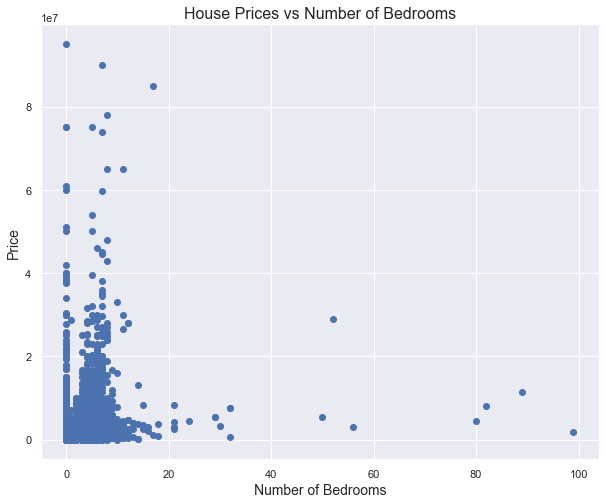

In [ ]:
#creating some scatterplots
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(all_data["bedrooms"], all_data['price'])
plt.xlabel("Number of Bedrooms", fontsize= 14)
plt.ylabel("Price", fontsize= 14)
plt.title("House Prices vs Number of Bedrooms", fontsize= 16)

Text(0.5, 1.0, 'House Prices vs Number of Bathrooms')

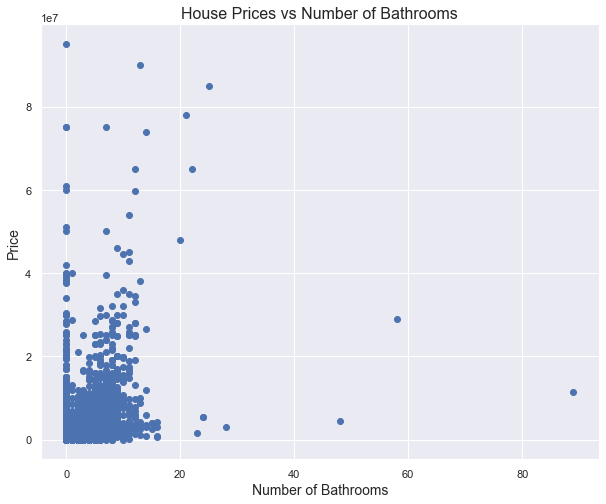

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(all_data["bathrooms"], all_data['price'])
plt.xlabel("Number of Bathrooms", fontsize= 14)
plt.ylabel("Price", fontsize= 14)
plt.title("House Prices vs Number of Bathrooms", fontsize= 16)

Text(0.5, 1.0, 'House Prices vs Living Area')

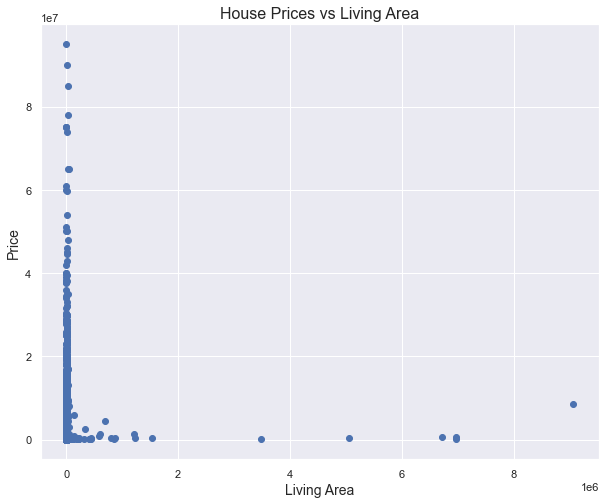

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(all_data["livingArea"], all_data['price'])
plt.xlabel("Living Area", fontsize= 14)
plt.ylabel("Price", fontsize= 14)
plt.title("House Prices vs Living Area", fontsize= 16)

Text(0.5, 1.0, 'House Price vs House Type')

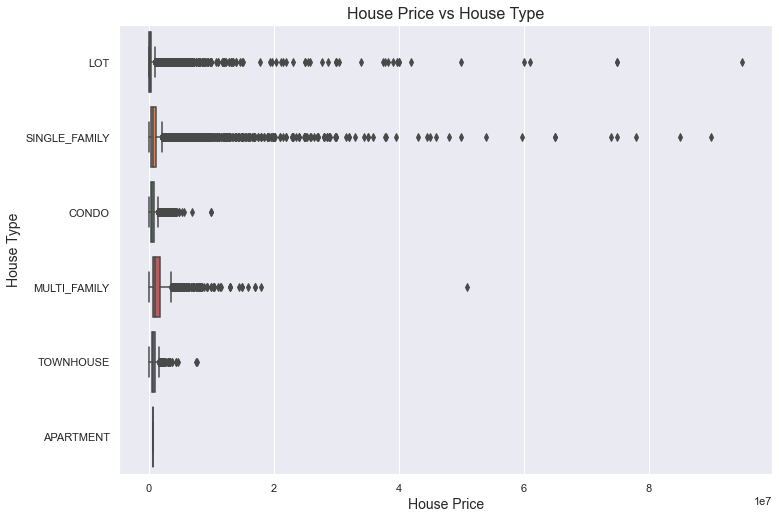

In [ ]:
# add a boxplot for house type vs price
import seaborn as sns

sns.set_theme(style="whitegrid")

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x=all_data["price"], y=all_data["homeType"])
ax.set_xlabel("House Price", fontsize=14)
ax.set_ylabel("House Type", fontsize=14)
ax.set_title("House Price vs House Type", fontsize=16)

Text(0.5, 1.0, 'House Price vs State')

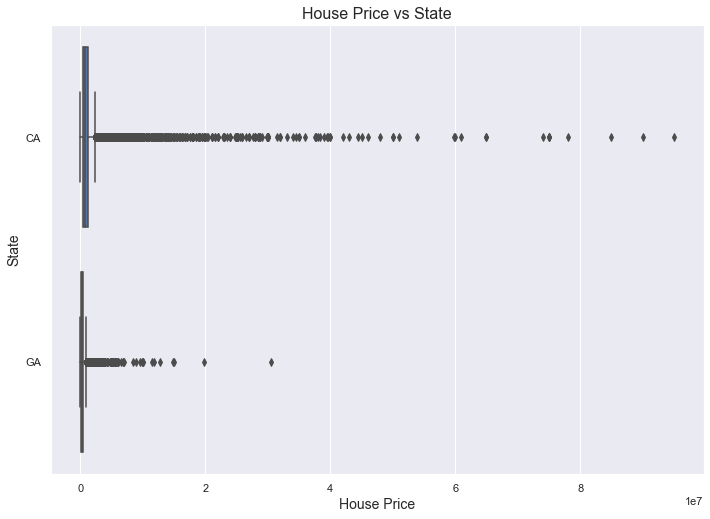

In [ ]:
# add a boxplot for state vs price
ax2 = sns.boxplot(x=all_data["price"], y=all_data["state"])
ax2.set_xlabel("House Price", fontsize=14)
ax2.set_ylabel("State", fontsize=14)
ax2.set_title("House Price vs State", fontsize=16)

## Cleaning Data

In [ ]:
#Checking for any missing values
all_data.isnull().values.any()

True

In [ ]:
#checking which columns have NAs
all_data.isna().any()

Unnamed: 0            False
id                    False
stateId               False
countyId              False
cityId                False
country               False
datePostedString       True
is_bankOwned          False
is_forAuction         False
event                 False
time                   True
price                 False
pricePerSquareFoot    False
city                  False
state                 False
yearBuilt             False
streetAddress         False
zipcode                True
longitude             False
latitude              False
hasBadGeocode         False
description            True
currency              False
livingArea            False
livingAreaValue       False
lotAreaUnits          False
bathrooms             False
bedrooms              False
buildingArea          False
parking               False
garageSpaces          False
hasGarage             False
levels                False
pool                  False
spa                   False
isNewConstruction   

In [ ]:
#checking which rows having NAs
all_data[all_data.isna().any(axis=1)]

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
20,20,91605-20000255,9,558,12447,USA,2021-07-12,0,0,None,...,1,2.0,1,One,0,0,0,0,SINGLE_FAMILY,Los Angeles County
46,46,91103-20864841,9,588,47019,USA,2021-07-12,0,0,Price change,...,0,0.0,0,One,0,0,0,0,SINGLE_FAMILY,Los Angeles County
170,170,92014-16765230,9,1421,54296,USA,2021-07-10,0,0,None,...,1,2.0,1,Multi/Split,0,1,0,0,SINGLE_FAMILY,San Diego County
249,249,91214-20816141,9,2909,45457,USA,2021-06-23,0,0,None,...,1,2.0,1,One,0,0,0,0,SINGLE_FAMILY,Los Angeles County
285,285,95815-26080777,9,3664,20288,USA,2021-07-09,0,1,None,...,1,0.0,0,0,0,0,0,0,MULTI_FAMILY,Sacramento County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12978,12978,30345-14551968,16,90913,17382,USA,2021-07-03,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Dekalb County
13058,13058,30576-2104185371,16,97006,14139,USA,2021-06-29,0,0,None,...,0,0.0,0,0,0,0,0,0,LOT,Rabun County
13088,13088,30901-14959437,16,98485,10210,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Richmond County
13297,13297,31548-2069648611,16,106738,52779,USA,2021-07-09,0,0,None,...,0,0.0,0,0,0,0,0,0,LOT,Camden County


In [ ]:
#subset to disclude events for rent
all_data2 = all_data[all_data["event"] != "Listed for rent"]
all_data2

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13799,13799,30054-69864676,16,128670,8877,USA,2021-06-25,0,0,Listing removed,...,0,0.0,0,0,0,0,0,0,LOT,Newton County
13800,13800,30054-69860763,16,128671,8877,USA,2021-06-25,0,0,Listing removed,...,0,0.0,0,0,0,0,0,0,LOT,Newton County
13801,13801,30054-69887935,16,128672,8877,USA,2021-06-18,0,0,Listed for sale,...,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County
13802,13802,30054-69871474,16,128673,8877,USA,2021-06-18,0,0,Price change,...,1,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County


In [ ]:
test = all_data2[all_data2["hasBadGeocode"] ==1]
test

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
11890,11890,95454-2107420442,9,147699,5577,USA,2021-06-27,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Mendocino County
24533,24533,92356-2099087074,9,325333,5721,USA,2021-07-01,0,0,Price change,...,0,0.0,0,0,0,0,0,0,LOT,San Bernardino County
24535,24535,92356-2115537027,9,325336,5721,USA,2021-07-01,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,San Bernardino County


In [ ]:
#removing lots from the data
all_data3 = all_data2[all_data2["homeType"] != "LOT"]
all_data3

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
5,5,94564-18484390,9,193,36958,USA,2021-07-06,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
6,6,94564-50919342,9,194,36958,USA,2021-07-05,0,0,Listed for sale,...,1,2.0,1,Two Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,13784,30054-69867027,16,128655,8877,USA,2021-07-05,0,0,Listed for sale,...,1,0.0,0,One,0,0,0,0,SINGLE_FAMILY,Newton County
13787,13787,30054-49887899,16,128658,8877,USA,2021-07-02,0,0,Price change,...,0,0.0,0,One,1,0,0,0,SINGLE_FAMILY,Walton County
13801,13801,30054-69887935,16,128672,8877,USA,2021-06-18,0,0,Listed for sale,...,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County
13802,13802,30054-69871474,16,128673,8877,USA,2021-06-18,0,0,Price change,...,1,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County


In [ ]:
#removing observations with bad geocodes
all_data4 = all_data3[all_data3["hasBadGeocode"] == 0]
all_data4

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
5,5,94564-18484390,9,193,36958,USA,2021-07-06,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
6,6,94564-50919342,9,194,36958,USA,2021-07-05,0,0,Listed for sale,...,1,2.0,1,Two Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,13784,30054-69867027,16,128655,8877,USA,2021-07-05,0,0,Listed for sale,...,1,0.0,0,One,0,0,0,0,SINGLE_FAMILY,Newton County
13787,13787,30054-49887899,16,128658,8877,USA,2021-07-02,0,0,Price change,...,0,0.0,0,One,1,0,0,0,SINGLE_FAMILY,Walton County
13801,13801,30054-69887935,16,128672,8877,USA,2021-06-18,0,0,Listed for sale,...,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County
13802,13802,30054-69871474,16,128673,8877,USA,2021-06-18,0,0,Price change,...,1,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County


In [ ]:
#checking for duplicates
duplicate = all_data4[all_data4.duplicated(subset=['id'])]
duplicate

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
25077,25077,93725-18771253,9,198,18203,USA,2021-07-14,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Fresno County
25078,25078,93702-18751598,9,199,18203,USA,2021-07-14,0,0,Listed for sale,...,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Fresno County
25079,25079,93703-18742006,9,200,18203,USA,2021-07-13,0,0,Listed for sale,...,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Fresno County
25080,25080,93703-18742083,9,201,18203,USA,2021-07-12,0,0,Listed for sale,...,1,1.0,1,One,0,0,0,0,SINGLE_FAMILY,Fresno County
25081,25081,93702-18755132,9,202,18203,USA,2021-07-12,0,0,Listed for sale,...,1,0.0,0,0,1,0,0,0,SINGLE_FAMILY,Fresno County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13746,13746,31768-105191544,16,127133,12849,USA,2021-06-08,0,0,Listed for sale,...,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Colquitt County
13760,13760,30306-14507592,16,128160,44978,USA,2021-07-09,0,0,Listed for sale,...,1,2.0,1,Two,1,0,0,0,SINGLE_FAMILY,Dekalb County
13761,13761,30306-35918570,16,128161,37211,USA,2021-07-09,0,0,Listed for sale,...,1,2.0,1,Three Or More,0,0,0,0,SINGLE_FAMILY,Fulton County
13763,13763,30306-14507684,16,128163,44978,USA,2021-07-08,0,0,Price change,...,1,2.0,1,Multi/Split,0,1,0,0,SINGLE_FAMILY,Dekalb County


I looked at many of the duplicated rows and they all had the same exact values for every feature, so I decieded to keep the last row for every duplicated observation.

In [ ]:
#dropping the duplicates
all_data5 = all_data4.drop_duplicates(
    subset=["id"], keep="last", inplace=False
).copy()
all_data5

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
5,5,94564-18484390,9,193,36958,USA,2021-07-06,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
6,6,94564-50919342,9,194,36958,USA,2021-07-05,0,0,Listed for sale,...,1,2.0,1,Two Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,13784,30054-69867027,16,128655,8877,USA,2021-07-05,0,0,Listed for sale,...,1,0.0,0,One,0,0,0,0,SINGLE_FAMILY,Newton County
13787,13787,30054-49887899,16,128658,8877,USA,2021-07-02,0,0,Price change,...,0,0.0,0,One,1,0,0,0,SINGLE_FAMILY,Walton County
13801,13801,30054-69887935,16,128672,8877,USA,2021-06-18,0,0,Listed for sale,...,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County
13802,13802,30054-69871474,16,128673,8877,USA,2021-06-18,0,0,Price change,...,1,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County


In [ ]:
#checking for duplicates again
all_data5.duplicated(subset=['id']).any()

False

In [ ]:
#dropping unneeded columns
all_data6 = all_data5.drop(columns=
    [
        "Unnamed: 0",
        "id",
        "country",
        "datePostedString",
        "time",
        "pricePerSquareFoot",
        "cityId",
        "stateId",
        "streetAddress",
        "zipcode",
        "latitude",
        "longitude",
        "description",
        "currency",
        "hasBadGeocode",
        "livingAreaValue",
        "countyId"

    ]
)

all_data6

,is_bankOwned,is_forAuction,event,price,city,state,yearBuilt,livingArea,lotAreaUnits,bathrooms,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
1,0,0,Listed for sale,675000.0,Pinole,CA,1958,1671.0,sqft,2.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,0,0,Listed for sale,649000.0,Pinole,CA,1959,1414.0,Acres,2.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,0,0,Listed for sale,599000.0,Pinole,CA,1908,1336.0,sqft,2.0,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
5,0,0,Listed for sale,575000.0,Pinole,CA,1958,1413.0,sqft,2.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
6,0,0,Listed for sale,888000.0,Pinole,CA,2000,2278.0,sqft,3.0,...,1,2.0,1,Two Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,0,0,Listed for sale,100000.0,Oxford,GA,1986,1081.0,Acres,2.0,...,1,0.0,0,One,0,0,0,0,SINGLE_FAMILY,Newton County
13787,0,0,Price change,254900.0,Oxford,GA,1978,1632.0,Acres,2.0,...,0,0.0,0,One,1,0,0,0,SINGLE_FAMILY,Walton County
13801,0,0,Listed for sale,350000.0,Oxford,GA,2002,2665.0,Acres,4.0,...,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County
13802,0,0,Price change,379000.0,Oxford,GA,2000,1960.0,Acres,3.0,...,1,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County


In [ ]:
#Checking for any missing values in final dataset
all_data6.isnull().values.any()

False

In [ ]:
#changing the year built column to a string
all_data6["yearBuilt"] = all_data6["yearBuilt"].astype("str")

In [ ]:
#looking at the data types of each column
all_data6.dtypes

is_bankOwned           int64
is_forAuction          int64
event                 object
price                float64
city                  object
state                 object
yearBuilt             object
livingArea           float64
lotAreaUnits          object
bathrooms            float64
bedrooms             float64
buildingArea         float64
parking                int64
garageSpaces         float64
hasGarage              int64
levels                object
pool                   int64
spa                    int64
isNewConstruction      int64
hasPetsAllowed         int64
homeType              object
county                object
dtype: object

In [ ]:
#making yearbuilt value unknown for years of 0.0 and 9999.0
all_data7 = all_data6.replace(to_replace= "0", 
value = "unknown")
all_data8 = all_data7.replace(to_replace= "9999", 
value = "unknown")

In [ ]:
#checking to make sure no years are 0
sub_yr0 = all_data8[all_data8["yearBuilt"] == "0"]
sub_yr0

,is_bankOwned,is_forAuction,event,price,city,state,yearBuilt,livingArea,lotAreaUnits,bathrooms,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county


In [ ]:
#checking to make sure no years are 9999
sub_yr9999 = all_data8[all_data8["yearBuilt"] == "9990"]
sub_yr9999

,is_bankOwned,is_forAuction,event,price,city,state,yearBuilt,livingArea,lotAreaUnits,bathrooms,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county


In [ ]:
#looking at the final data set
all_data8

,is_bankOwned,is_forAuction,event,price,city,state,yearBuilt,livingArea,lotAreaUnits,bathrooms,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
1,0,0,Listed for sale,675000.0,Pinole,CA,1958,1671.0,sqft,2.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,0,0,Listed for sale,649000.0,Pinole,CA,1959,1414.0,Acres,2.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,0,0,Listed for sale,599000.0,Pinole,CA,1908,1336.0,sqft,2.0,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
5,0,0,Listed for sale,575000.0,Pinole,CA,1958,1413.0,sqft,2.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
6,0,0,Listed for sale,888000.0,Pinole,CA,2000,2278.0,sqft,3.0,...,1,2.0,1,Two Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,0,0,Listed for sale,100000.0,Oxford,GA,1986,1081.0,Acres,2.0,...,1,0.0,0,One,0,0,0,0,SINGLE_FAMILY,Newton County
13787,0,0,Price change,254900.0,Oxford,GA,1978,1632.0,Acres,2.0,...,0,0.0,0,One,1,0,0,0,SINGLE_FAMILY,Walton County
13801,0,0,Listed for sale,350000.0,Oxford,GA,2002,2665.0,Acres,4.0,...,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Newton County
13802,0,0,Price change,379000.0,Oxford,GA,2000,1960.0,Acres,3.0,...,1,2.0,1,One,1,1,0,0,SINGLE_FAMILY,Newton County


In [ ]:
#importing final data into a seperate file
from pathlib import Path

path3 = Path(PARENT).parent / "../Data"
all_data8.to_csv(path3/'cleaned_data.csv')